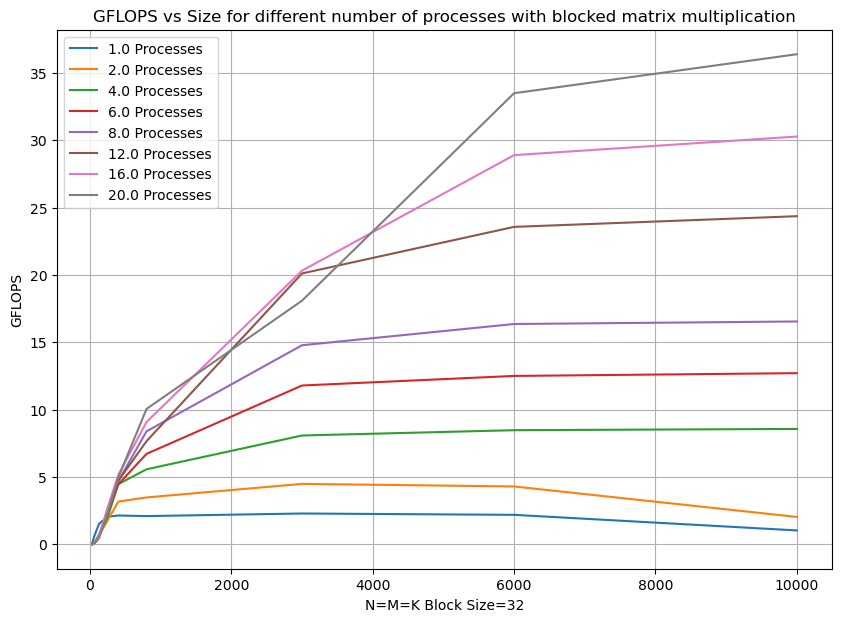

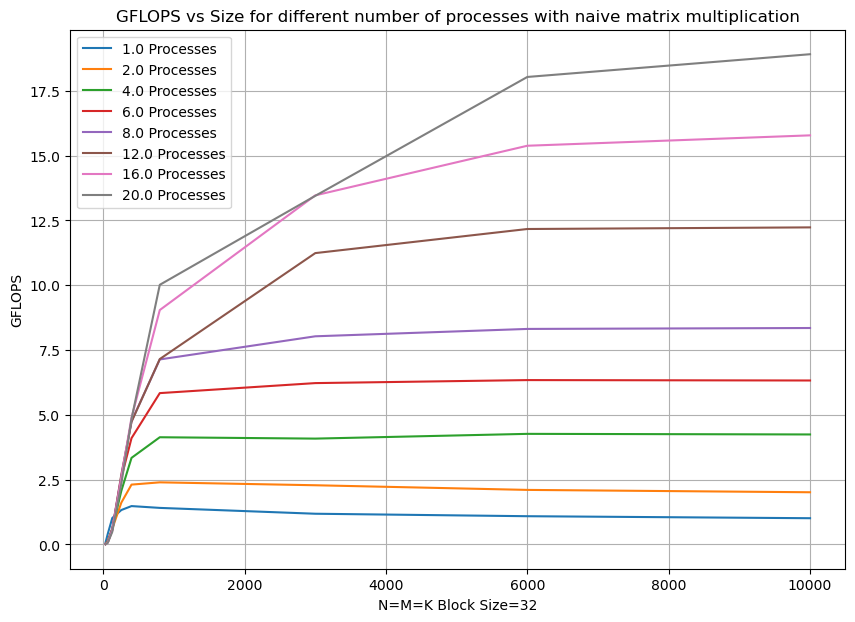

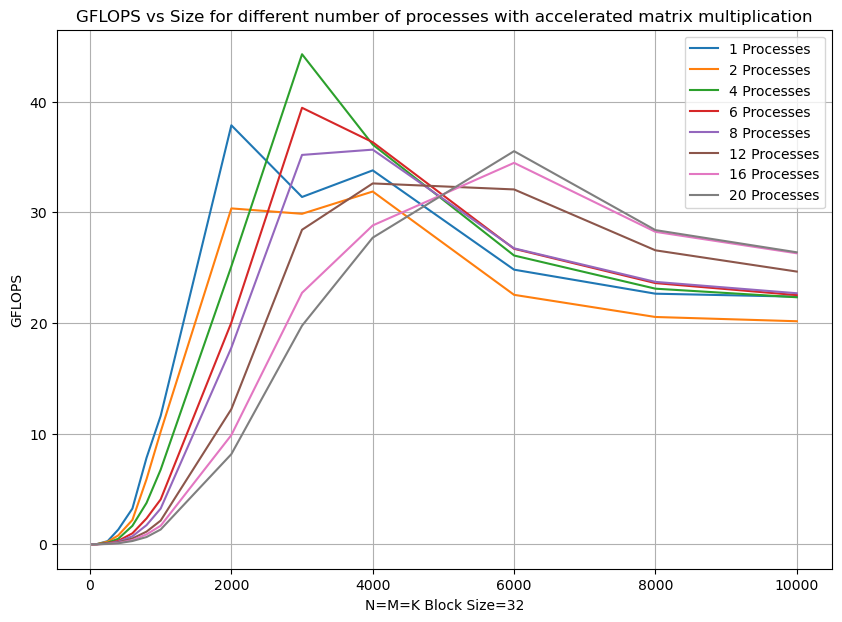

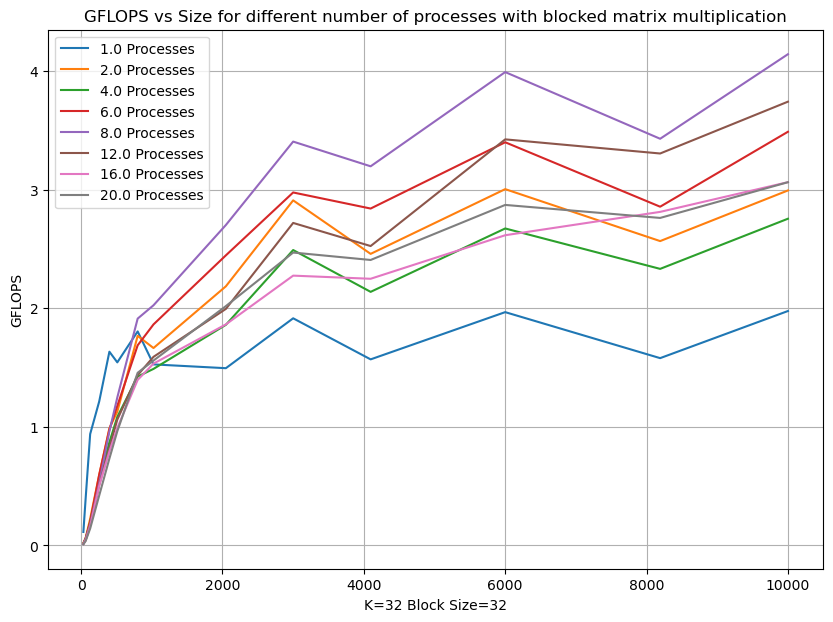

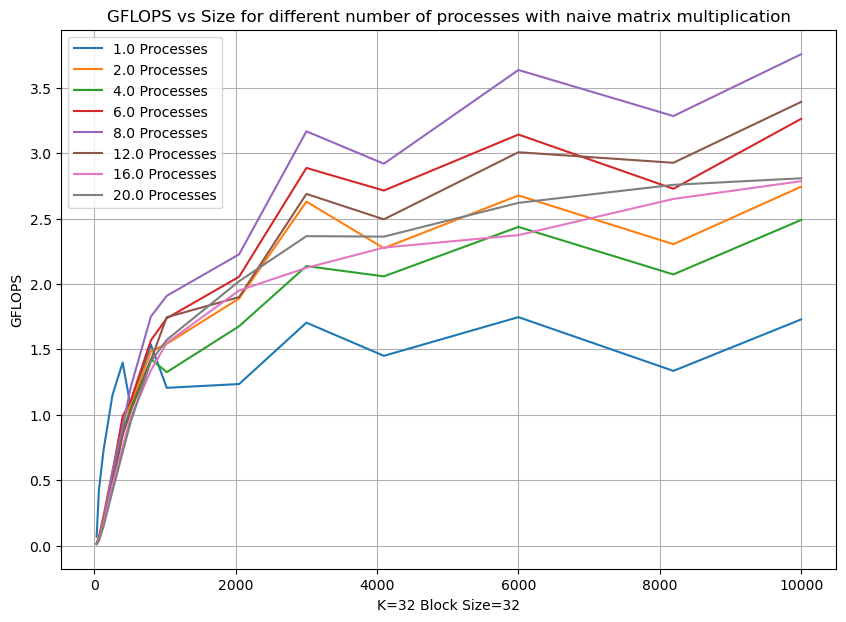

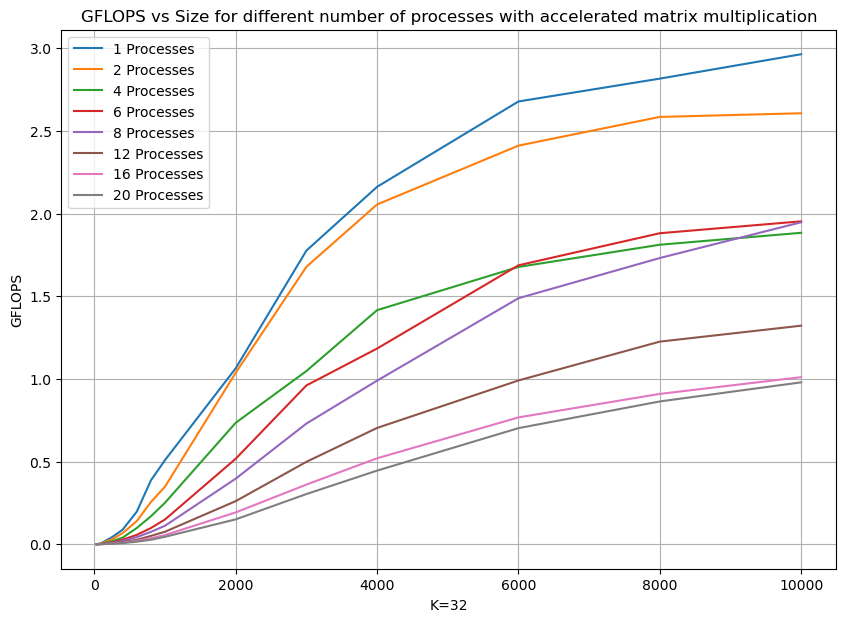

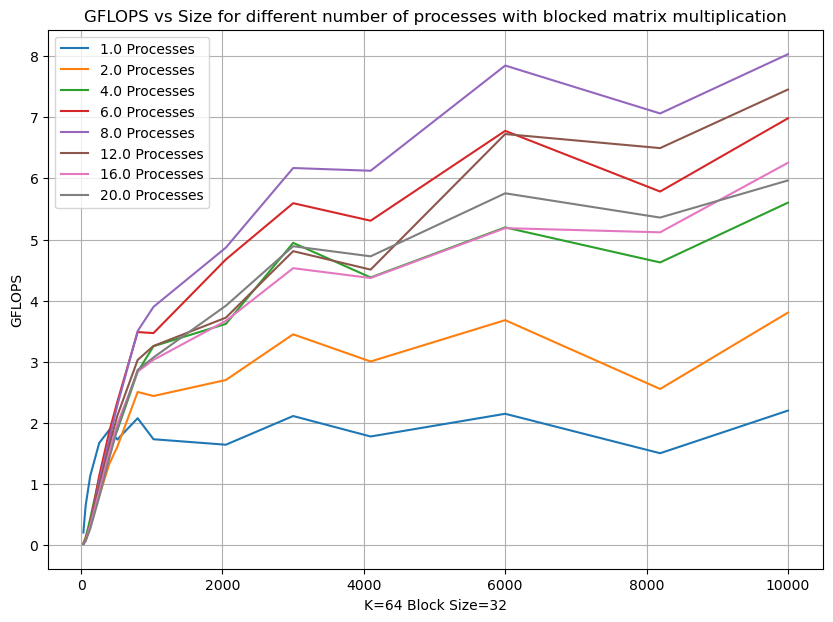

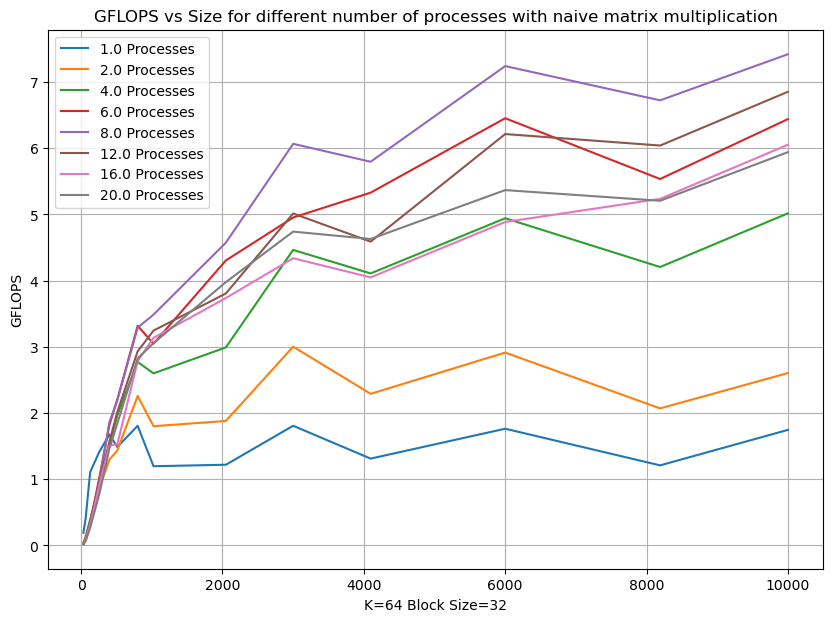

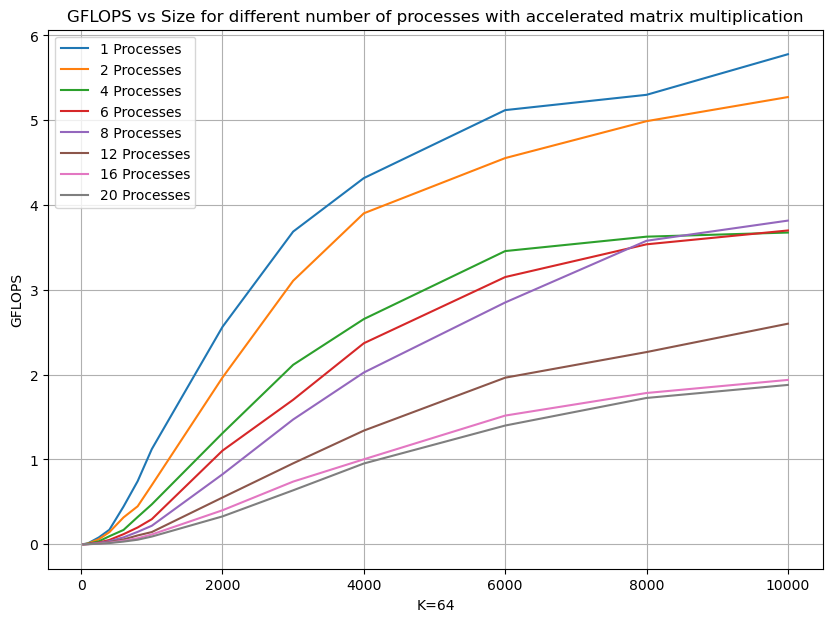

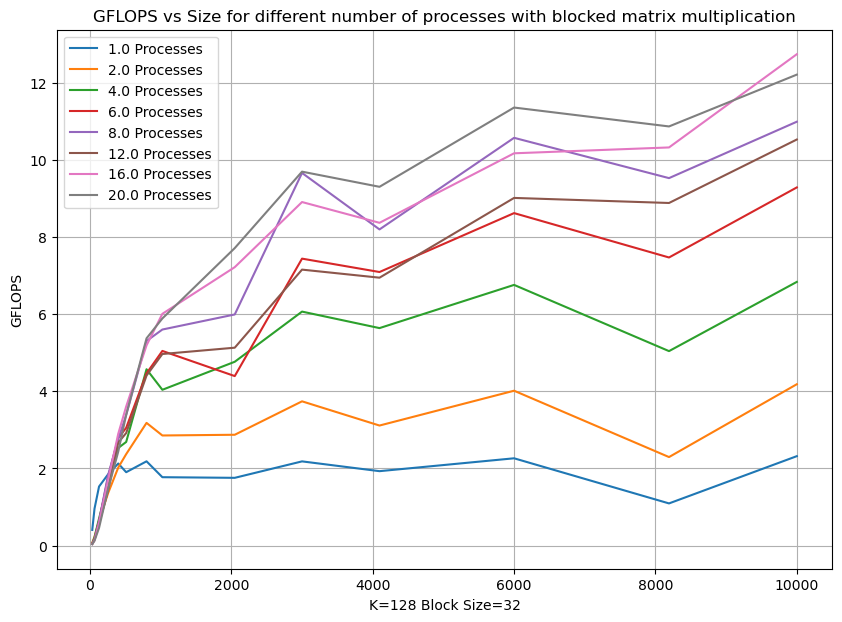

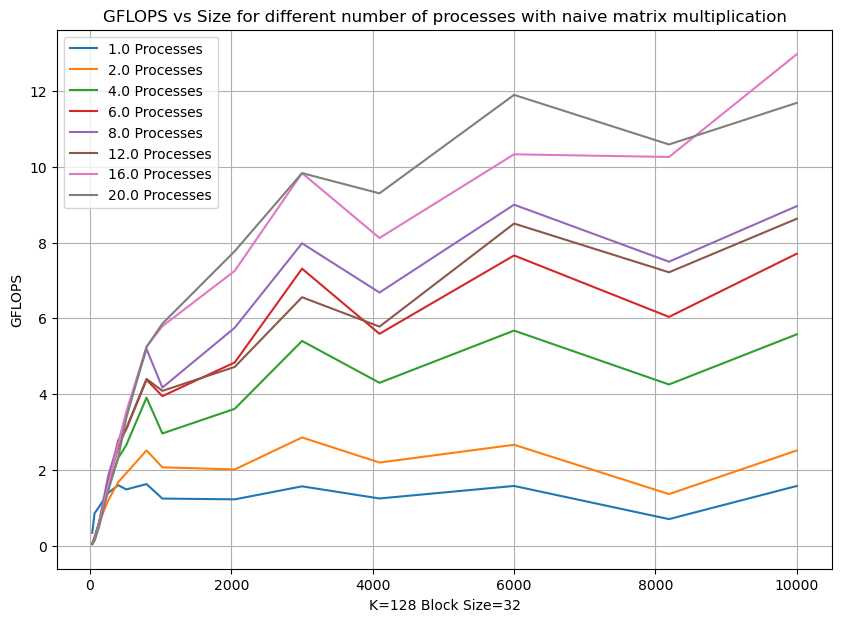

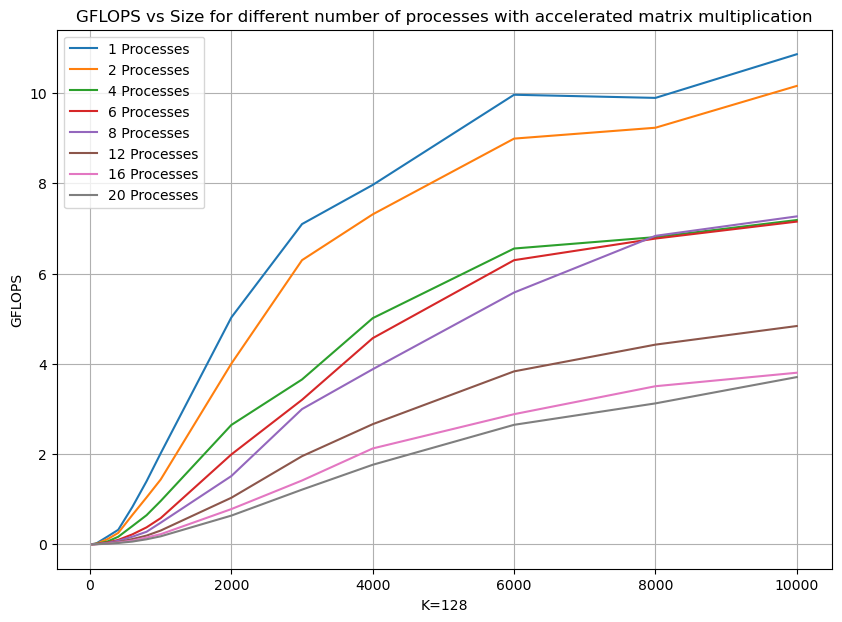

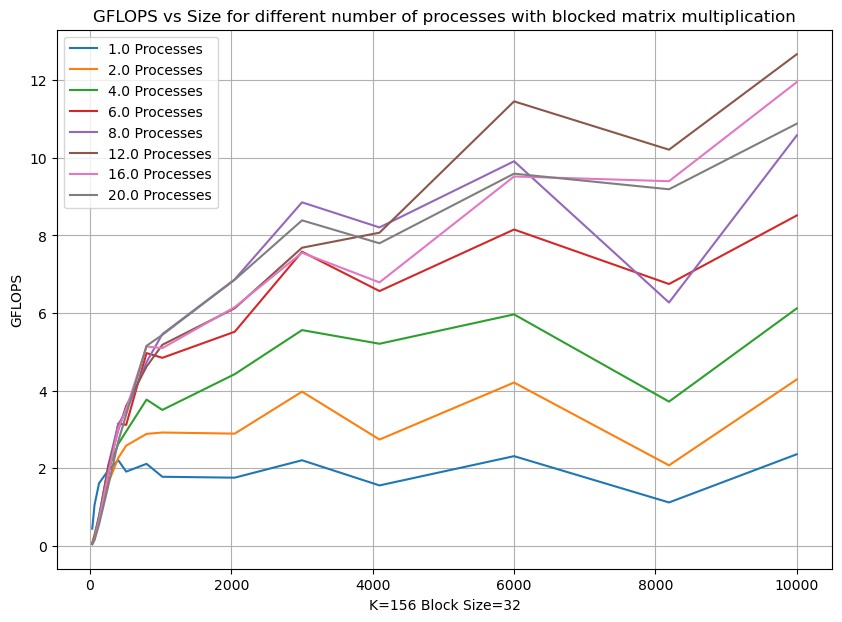

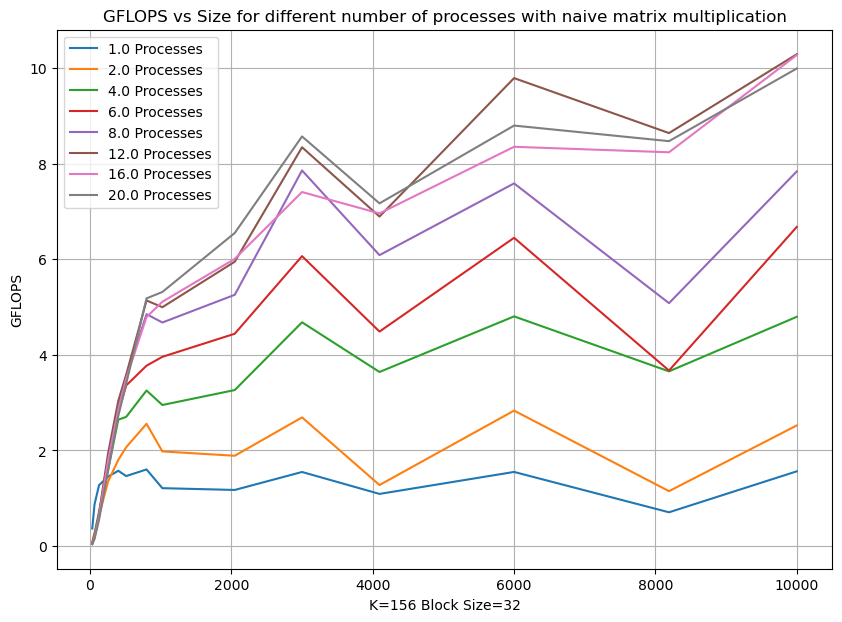

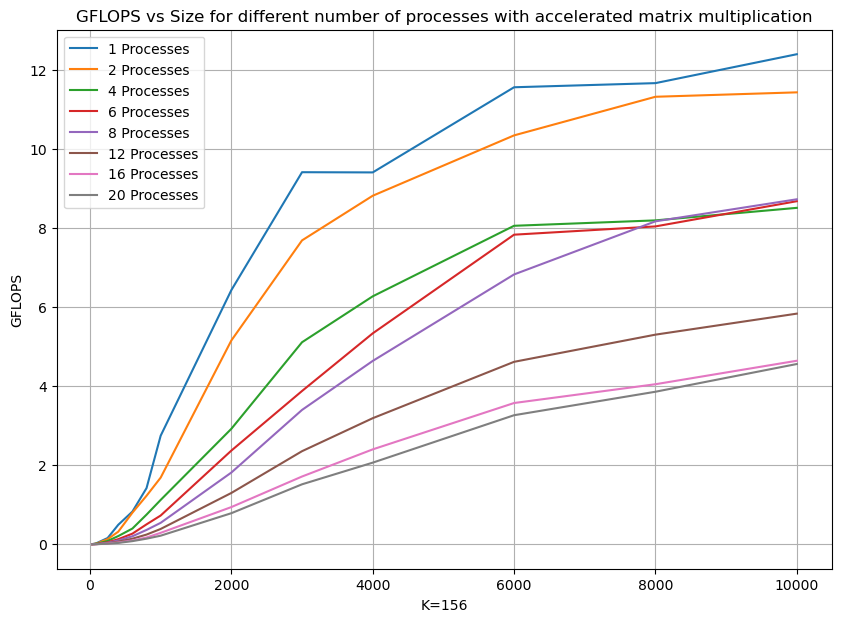

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV
path_blocked = "./data/out/MPI/result_blocked_{}.csv"
path_unblocked = "./data/out/MPI/result_non_blocked_{}.csv"
path_accelerated = "./data/out/MPI_CUDA/result_accelerated_{}.csv"
num_dataset = 5
k = [32, 64, 128, 156]

#init
ds_blocked = pd.read_csv(path_blocked.format(1))
ds_unblocked = pd.read_csv(path_unblocked.format(1))
ds_accelerated = pd.read_csv(path_accelerated.format("mean"))

for i in range(2, num_dataset+1):
    temp_blocked = pd.read_csv(path_blocked.format(i))
    temp_unblocked = pd.read_csv(path_unblocked.format(i))
    ds_blocked = ds_blocked + temp_blocked
    ds_unblocked = ds_unblocked + temp_unblocked

#take mean data    
ds_blocked = ds_blocked / num_dataset
ds_unblocked = ds_unblocked / num_dataset


#Remove blank spaces from column names
ds_blocked = ds_blocked.rename(columns=lambda x: x.strip())
ds_unblocked = ds_unblocked.rename(columns=lambda x: x.strip())
ds_accelerated = ds_accelerated.rename(columns=lambda x: x.strip())

#Filter data for square matrices
ds_blocked_square = ds_blocked[ds_blocked['mat_A_rows'] == ds_blocked['mat_A_cols']]
ds_unblocked_square = ds_unblocked[ds_unblocked['mat_A_rows'] == ds_unblocked['mat_A_cols']]
ds_accelerated_square = ds_accelerated[ds_accelerated['mat_A_rows'] == ds_accelerated['mat_A_cols']]

#ds_blocked_square drop row with mat_A_rows=512, 1024, 2048, 4096 and 8192
ds_blocked_square = ds_blocked_square[ds_blocked_square['mat_A_rows'] != 512]
ds_blocked_square = ds_blocked_square[ds_blocked_square['mat_A_rows'] != 1024]
ds_blocked_square = ds_blocked_square[ds_blocked_square['mat_A_rows'] != 2048]
ds_blocked_square = ds_blocked_square[ds_blocked_square['mat_A_rows'] != 4096]
ds_blocked_square = ds_blocked_square[ds_blocked_square['mat_A_rows'] != 8192]

#ds_unblocked_square drop row with mat_A_rows=512, 1024, 2048, 4096 and 8192
ds_unblocked_square = ds_unblocked_square[ds_unblocked_square['mat_A_rows'] != 512]
ds_unblocked_square = ds_unblocked_square[ds_unblocked_square['mat_A_rows'] != 1024]
ds_unblocked_square = ds_unblocked_square[ds_unblocked_square['mat_A_rows'] != 2048]
ds_unblocked_square = ds_unblocked_square[ds_unblocked_square['mat_A_rows'] != 4096]
ds_unblocked_square = ds_unblocked_square[ds_unblocked_square['mat_A_rows'] != 8192]


# Group squared matrix data by number of processes
grouped_blocked_square = ds_blocked_square.groupby('num_proc')
grouped_unblocked_square = ds_unblocked_square.groupby('num_proc')
grouped_accelerated_square = ds_accelerated_square.groupby('num_proc')

# Plot data for square matrix
plt.figure(figsize=(10, 7))
for name, group in grouped_blocked_square:
    plt.plot(group['mat_A_rows'], group['gflops'], label=f'{name} Processes')

plt.xlabel('N=M=K Block Size=32')
#plt.xscale('log')  # Set x-axis scale to logarithmic
plt.ylabel('GFLOPS')
plt.title('GFLOPS vs Size for different number of processes with blocked matrix multiplication')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 7))

for name, group in grouped_unblocked_square:
    plt.plot(group['mat_A_rows'], group['gflops'], label=f'{name} Processes')

plt.xlabel('N=M=K Block Size=32')
#plt.xscale('log')  # Set x-axis scale to logarithmic
plt.ylabel('GFLOPS')
plt.title('GFLOPS vs Size for different number of processes with naive matrix multiplication')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 7))

for name, group in grouped_accelerated_square:
    plt.plot(group['mat_A_rows'], group['gflops'], label=f'{name} Processes')

plt.xlabel('N=M=K Block Size=32')
#plt.xscale('log')  # Set x-axis scale to logarithmic
plt.ylabel('GFLOPS')
plt.title('GFLOPS vs Size for different number of processes with accelerated matrix multiplication')
plt.legend()
plt.grid(True)
plt.show()

for x in k:
    
    #Filter data for a certain K
    ds_blocked_k = ds_blocked[ds_blocked['mat_A_cols'] == x]
    ds_unblocked_k = ds_unblocked[ds_unblocked['mat_A_cols'] == x]
    ds_accelerated_k = ds_accelerated[ds_accelerated['mat_A_cols'] == x]

    #ds_blocked_k drop row with mat_A_rows=mat_A_cols=512, 1024, 2048, 4096 and 8192
    ds_blocked_k = ds_blocked_k[(ds_blocked_k['mat_A_rows'] != 512)&(ds_blocked_k['mat_A_cols'] != 512)]
    ds_blocked_k = ds_blocked_k[(ds_blocked_k['mat_A_rows'] != 1024)&(ds_blocked_k['mat_A_cols'] != 1024)]
    ds_blocked_k = ds_blocked_k[(ds_blocked_k['mat_A_rows'] != 2048)&(ds_blocked_k['mat_A_cols'] != 2048)]
    ds_blocked_k = ds_blocked_k[(ds_blocked_k['mat_A_rows'] != 4096)&(ds_blocked_k['mat_A_cols'] != 4096)]
    ds_blocked_k = ds_blocked_k[(ds_blocked_k['mat_A_rows'] != 8192)&(ds_blocked_k['mat_A_cols'] != 8192)]

    #ds_unblocked_k drop row with mat_A_rows=mat_A_cols=1024, 2048, 4096 and 8192
    ds_unblocked_k = ds_unblocked_k[(ds_unblocked_k['mat_A_rows'] != 512)&(ds_unblocked_k['mat_A_cols'] != 512)]
    ds_unblocked_k = ds_unblocked_k[(ds_unblocked_k['mat_A_rows'] != 1024)&(ds_unblocked_k['mat_A_cols'] != 1024)]
    ds_unblocked_k = ds_unblocked_k[(ds_unblocked_k['mat_A_rows'] != 2048)&(ds_unblocked_k['mat_A_cols'] != 2048)]
    ds_unblocked_k = ds_unblocked_k[(ds_unblocked_k['mat_A_rows'] != 4096)&(ds_unblocked_k['mat_A_cols'] != 4096)]
    ds_unblocked_k = ds_unblocked_k[(ds_unblocked_k['mat_A_rows'] != 8192)&(ds_unblocked_k['mat_A_cols'] != 8192)]
    
    # Group squared matrix data by number of processes
    grouped_blocked_k = ds_blocked_k.groupby('num_proc')
    grouped_unblocked_k = ds_unblocked_k.groupby('num_proc')
    grouped_accelerated_k = ds_accelerated_k.groupby('num_proc')
    
    plt.figure(figsize=(10, 7))
    
    for name, group in grouped_blocked_k:
        plt.plot(group['mat_A_rows'], group['gflops'], label=f'{name} Processes')

    plt.xlabel('K={} Block Size=32'.format(x))
    #plt.xscale('log')  # Set x-axis scale to logarithmic
    plt.ylabel('GFLOPS')
    plt.title('GFLOPS vs Size for different number of processes with blocked matrix multiplication')
    plt.legend()
    plt.grid(True)
    plt.show()


    plt.figure(figsize=(10, 7))

    for name, group in grouped_unblocked_k:
        plt.plot(group['mat_A_rows'], group['gflops'], label=f'{name} Processes')

    plt.xlabel('K={} Block Size=32'.format(x))
    #plt.xscale('log')  # Set x-axis scale to logarithmic
    plt.ylabel('GFLOPS')
    plt.title('GFLOPS vs Size for different number of processes with naive matrix multiplication')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 7))

    for name, group in grouped_accelerated_k:
        plt.plot(group['mat_A_rows'], group['gflops'], label=f'{name} Processes')

    plt.xlabel('K={}'.format(x))
    #plt.xscale('log')  # Set x-axis scale to logarithmic
    plt.ylabel('GFLOPS')
    plt.title('GFLOPS vs Size for different number of processes with accelerated matrix multiplication')
    plt.legend()
    plt.grid(True)
    plt.show()




In [4]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Load data from CSV
# path_blocked = "./data/out/MPI/result_blocked_{}.csv"
# path_unblocked = "./data/out/MPI/result_non_blocked_{}.csv"
# num_dataset = 5
# k = [32, 64, 128, 156]

# #init
# ds_blocked = pd.read_csv(path_blocked.format(1))
# ds_unblocked = pd.read_csv(path_unblocked.format(1))

# for i in range(2, num_dataset+1):
#     temp_blocked = pd.read_csv(path_blocked.format(i))
#     temp_unblocked = pd.read_csv(path_unblocked.format(i))
#     ds_blocked = ds_blocked + temp_blocked
#     ds_unblocked = ds_unblocked + temp_unblocked

# #take mean data    
# ds_blocked = ds_blocked / num_dataset
# ds_unblocked = ds_unblocked / num_dataset

# #Remove blank spaces from column names
# ds_blocked = ds_blocked.rename(columns=lambda x: x.strip())
# ds_unblocked = ds_unblocked.rename(columns=lambda x: x.strip())

# #Filter data for square matrices
# ds_blocked_square = ds_blocked[ds_blocked['mat_A_rows'] == ds_blocked['mat_A_cols']]
# ds_unblocked_square = ds_unblocked[ds_unblocked['mat_A_rows'] == ds_unblocked['mat_A_cols']]

# # Group squared matrix data by number of processes
# grouped_blocked_square = ds_blocked_square.groupby('num_proc')
# grouped_unblocked_square = ds_unblocked_square.groupby('num_proc')

# # Plot data for square matrix
# plt.figure(figsize=(10, 7))
# for name, group in grouped_blocked_square:
#     plt.plot(group['mat_A_rows'], group['elapsed_time'], label=f'{name} Processes')

# plt.xlabel('N=M=K')
# #plt.xscale('log')  # Set x-axis scale to logarithmic
# plt.ylabel('Elapsed Time')
# plt.title('Elapsed Time vs Size for different number of processes with blocked matrix multiplication')
# plt.legend()
# plt.grid(True)
# plt.show()


# plt.figure(figsize=(10, 7))

# for name, group in grouped_unblocked_square:
#     plt.plot(group['mat_A_rows'], group['elapsed_time'], label=f'{name} Processes')

# plt.xlabel('N=M=K')
# #plt.xscale('log')  # Set x-axis scale to logarithmic
# plt.ylabel('Elapsed Time')
# plt.title('Elapsed Time vs Size for different number of processes with naive matrix multiplication')
# plt.legend()
# plt.grid(True)
# plt.show()

# for x in k:
    
#     #Filter data for a certain K
#     ds_blocked_k = ds_blocked[ds_blocked['mat_A_cols'] == x]
#     ds_unblocked_k = ds_unblocked[ds_unblocked['mat_A_cols'] == x]
    
#     # Group squared matrix data by number of processes
#     grouped_blocked_k = ds_blocked_k.groupby('num_proc')
#     grouped_unblocked_k = ds_unblocked_k.groupby('num_proc')
    
#     plt.figure(figsize=(10, 7))
    
#     for name, group in grouped_blocked_k:
#         plt.plot(group['mat_A_rows'], group['elapsed_time'], label=f'{name} Processes')

#     plt.xlabel('K={}'.format(x))
#     #plt.xscale('log')  # Set x-axis scale to logarithmic
#     plt.ylabel('Elapsed Time')
#     plt.title('Elapsed Time vs Size for different number of processes with blocked matrix multiplication')
#     plt.legend()
#     plt.grid(True)
#     plt.show()


#     plt.figure(figsize=(10, 7))

#     for name, group in grouped_unblocked_k:
#         plt.plot(group['mat_A_rows'], group['elapsed_time'], label=f'{name} Processes')

#     plt.xlabel('K={}'.format(x))
#     #plt.xscale('log')  # Set x-axis scale to logarithmic
#     plt.ylabel('Elapsed Time')
#     plt.title('Elapsed Time vs Size for different number of processes with naive matrix multiplication')
#     plt.legend()
#     plt.grid(True)
#     plt.show()